# Exercise Sheet 3- Singular Value Decomposition (SVD)

**Submission until November 21 at 5 p.m. in the corresponding folder in StudIP.** \
For this exercise we want to use the SVD of a matrix $A=U\Sigma V^\top$ to solve different tasks. In particular, we will make use the truncated SVD, $U_k\Sigma_k V_k^\top = \sum_{i=1}^k \sigma_i u_i v_i^\top$, where only the first $k$ singular values of $A$ are considered.

## (1) SVD-based classification of MNIST dataset

We start with the well-known MNIST data set, which consists of 70,000 images of hand-written digits from 0 to 9, each image is $28\times 28$ pixels (8-bit gray value). The data set is split into 60,000 training images and 10,000 test images.

Execute the following code cells to get an idea about the data set and visualize some numbers.

11490434/11490434 [==============================] - 0s 0us/step
Out of the 60,000 training images:
   5923  images belong to digit  0 , first five examples:


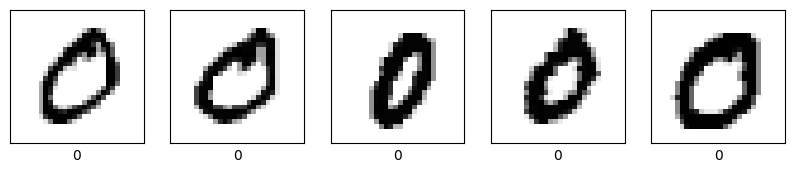

   6742  images belong to digit  1 , first five examples:


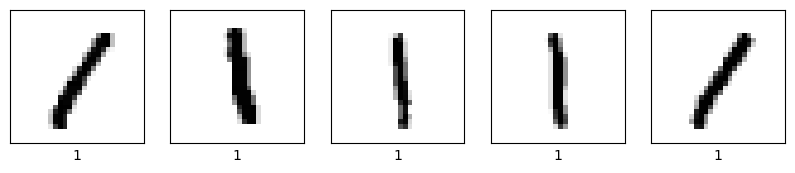

   5958  images belong to digit  2 , first five examples:


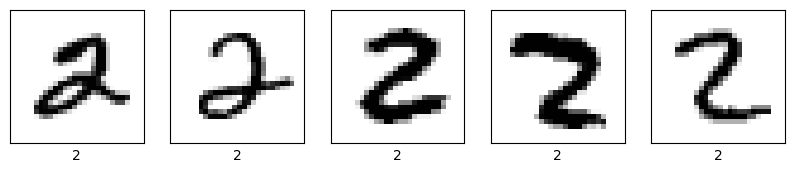

   6131  images belong to digit  3 , first five examples:


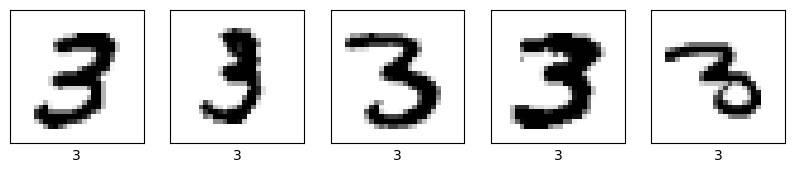

   5842  images belong to digit  4 , first five examples:


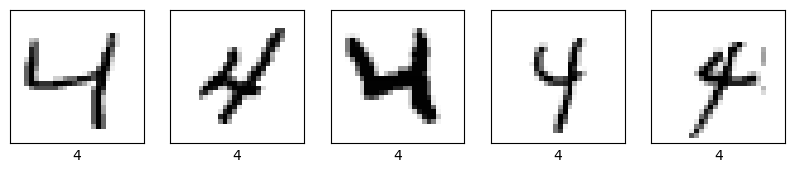

   5421  images belong to digit  5 , first five examples:


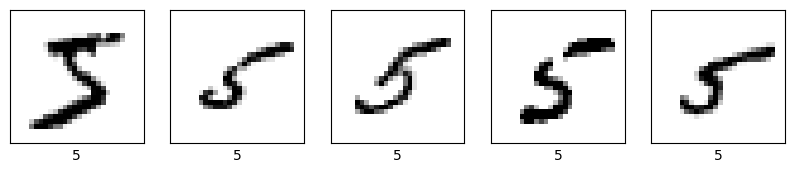

   5918  images belong to digit  6 , first five examples:


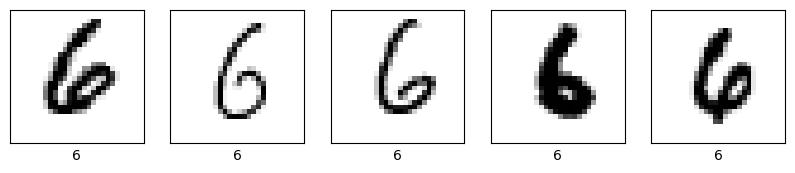

   6265  images belong to digit  7 , first five examples:


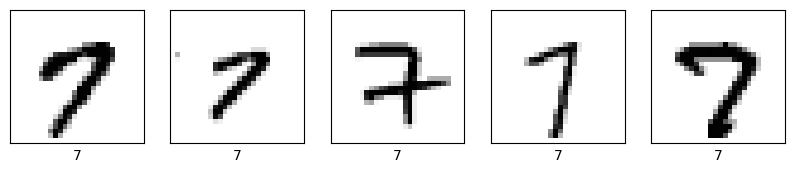

   5851  images belong to digit  8 , first five examples:


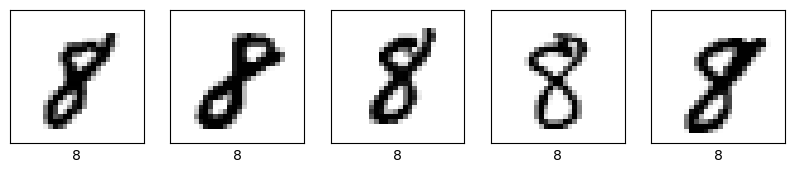

   5949  images belong to digit  9 , first five examples:


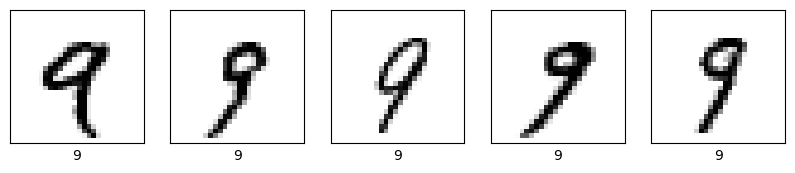

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mplt
np.random.seed(1234)

# load MNIST data set with 60,000 training images (28x28) of digits 0,1,...,9
# and 10,000 test images
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# normalize to range [0,1]
train_images = train_images / 255.0
test_images = test_images / 255.0
#class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# helper function to display images
# idxs is array of indices for images and labels input parameter
# images is array of dimension (number_of_images,num_rows,num_columns)
# labels is array of dimension (number_of_images)
def show_img(idxs, images, labels):
    num_cols = 5
    num_rows = int(np.ceil(np.array(idxs).size/5))
    plt.figure(figsize=(2*num_cols, 2*num_rows))
    for i, idx in enumerate(idxs):
        plt.subplot(num_rows,num_cols,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[idx], cmap=plt.cm.binary)
        plt.xlabel(labels[idx])
    plt.tight_layout
    plt.show()

print('Out of the 60,000 training images:')

for cur_digit in range(10):
    indices_d = np.argwhere(train_labels == cur_digit)[:,0]
    print('  ', indices_d.size,' images belong to digit ', cur_digit, ', first five examples:')
    show_img(indices_d[0:5], train_images, train_labels)

 The first 10 entries of the training data:


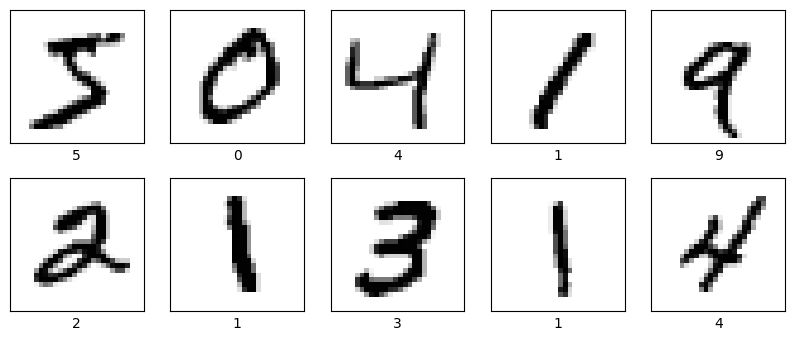

In [3]:
# Show the first 10 entries of the training data
print(' The first 10 entries of the training data:')
show_img(range(10), train_images, train_labels)

In [12]:
#np.reshape(train_images[0], (784,1))

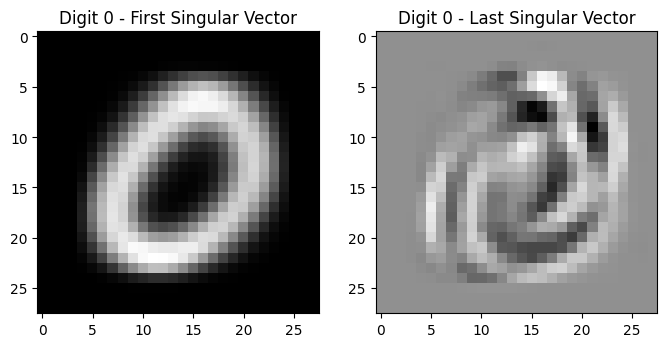

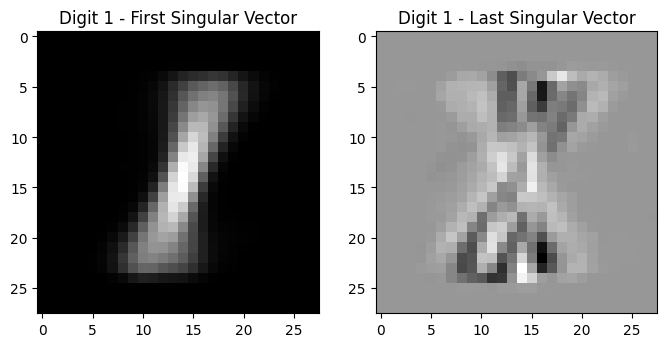

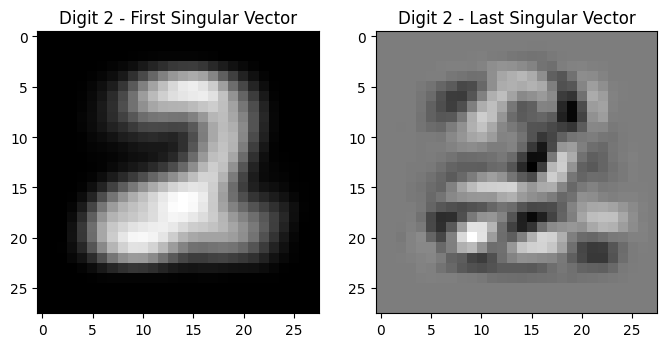

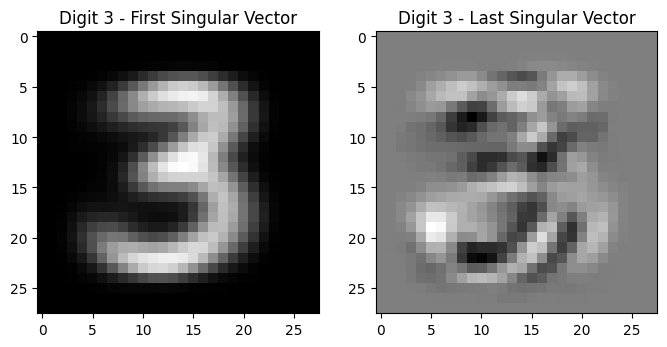

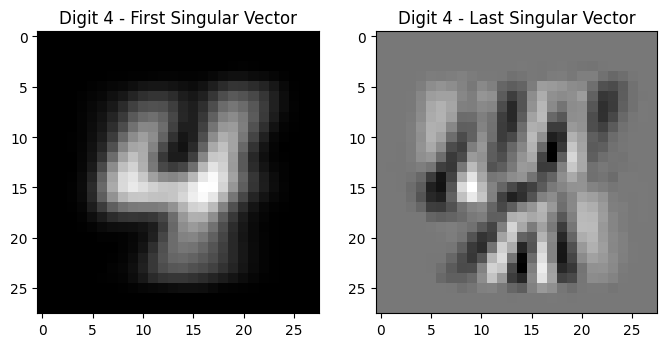

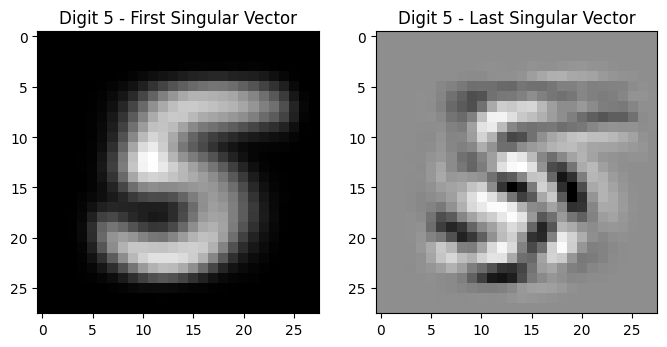

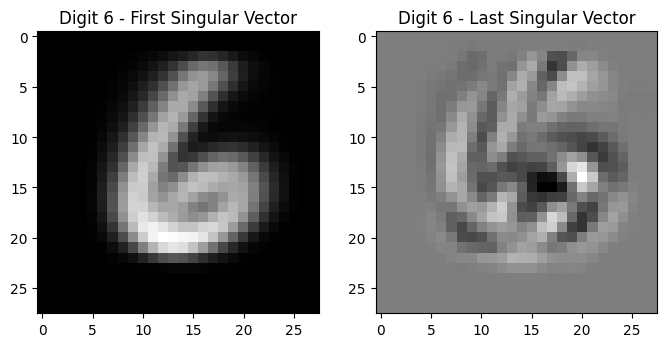

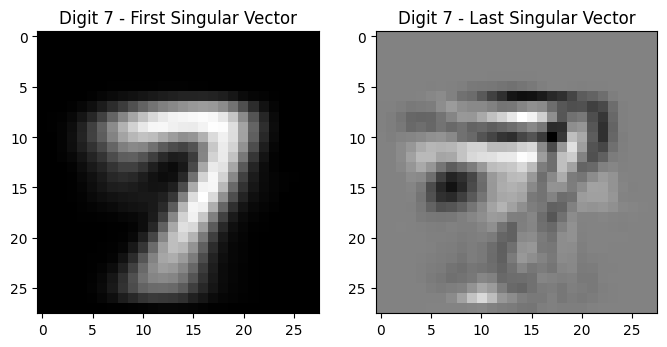

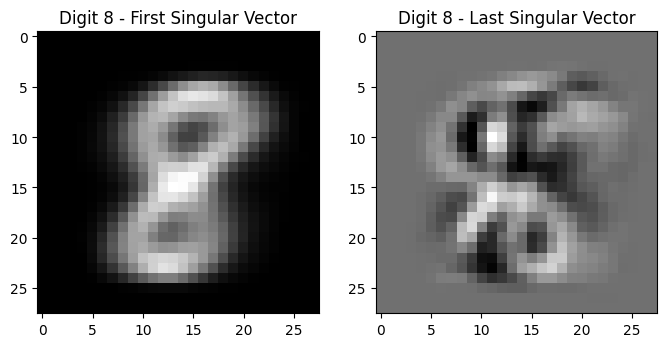

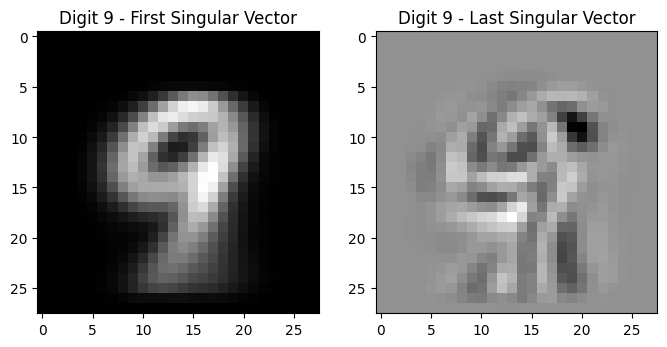

In [18]:
from sklearn.decomposition import TruncatedSVD

# Number of training images per digit
m_per_digit = 1000

# Number of singular values to keep
k_singular_values = 20

# Dictionary to store first and last left-singular vectors for each digit
singular_vectors = {}

# Iterate over each digit
for digit in range(10):
    # Select images for the current digit
    digit_indices = np.where(train_labels == digit)[0][:m_per_digit]
    digit_images = train_images[digit_indices].reshape(m_per_digit, -1)

    # Compute truncated SVD
    svd = TruncatedSVD(n_components=k_singular_values)
    svd.fit(digit_images)
    left_singular_vectors = svd.components_

    # Store the first and last left-singular vectors
    first_singular_vector = left_singular_vectors[0].reshape(28, 28)
    last_singular_vector = left_singular_vectors[-1].reshape(28, 28)

    singular_vectors[digit] = {
        'first': first_singular_vector,
        'last': last_singular_vector
    }

# Display the first and last left-singular vector for each digit
for digit in range(10):
    plt.figure(figsize=(8, 4))

    plt.subplot(1, 2, 1)
    plt.imshow(singular_vectors[digit]['first'], cmap='gray')
    plt.title(f'Digit {digit} - First Singular Vector')

    plt.subplot(1, 2, 2)
    plt.imshow(singular_vectors[digit]['last'], cmap='gray')
    plt.title(f'Digit {digit} - Last Singular Vector')

    plt.show()


**Task: For each digit $d\in\{0,1,2,\ldots,9\}$, compute the truncated SVD of a certain number ($m\in\mathbb{N}$) of training images, e.g., choose $m=1000$ and $k=20$ singular values. Then, display the first and last left-singular vector of each digit as an image (e.g. using the show_img function from before).Explain in a few words, why the both images look so different. (8 points)**

Hint: Copy the $28\times 28$ pixels ($=28^2=784$) of the $m$ training images (for each digit $d$) into a matrix  $A^{(d)}\in\mathbb{R}^{784 \times m}$, with each column belonging to one reshaped image. Then, compute the matrices of the truncated SVD $U^{(d)}_k \Sigma^{(d)}_k (V^{(d)}_k)^\top = A^{(d)}_k$ of $A^{(d)}$. For displaying the images, undo the reshaping for the first and last singular vector of $U^{(d)}_k\in\mathbb{R}^{784\times k}$.

The related numpy functions are `np.linalg.svd` (full) and `np.sparse.linalg.svds` (truncated).

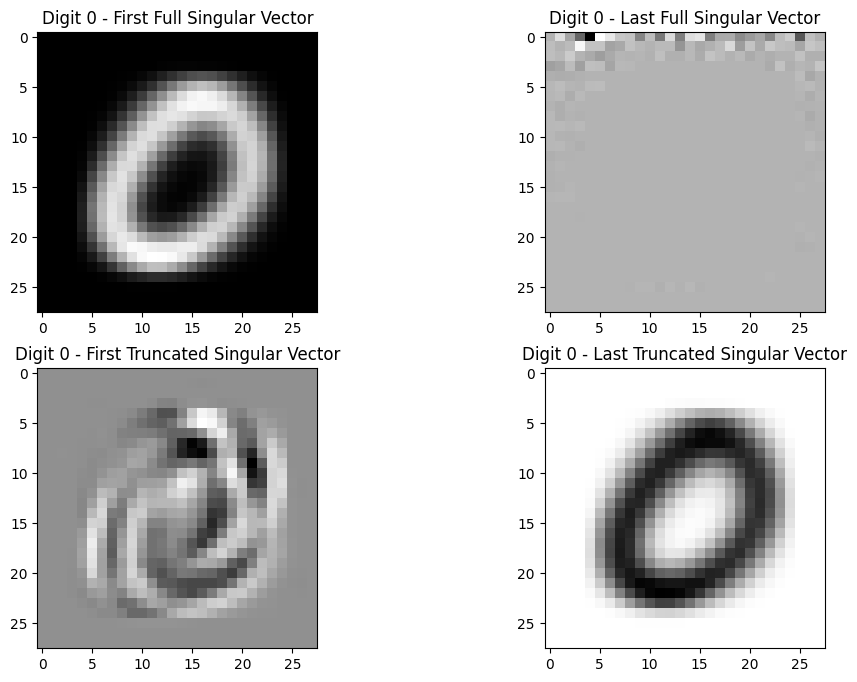

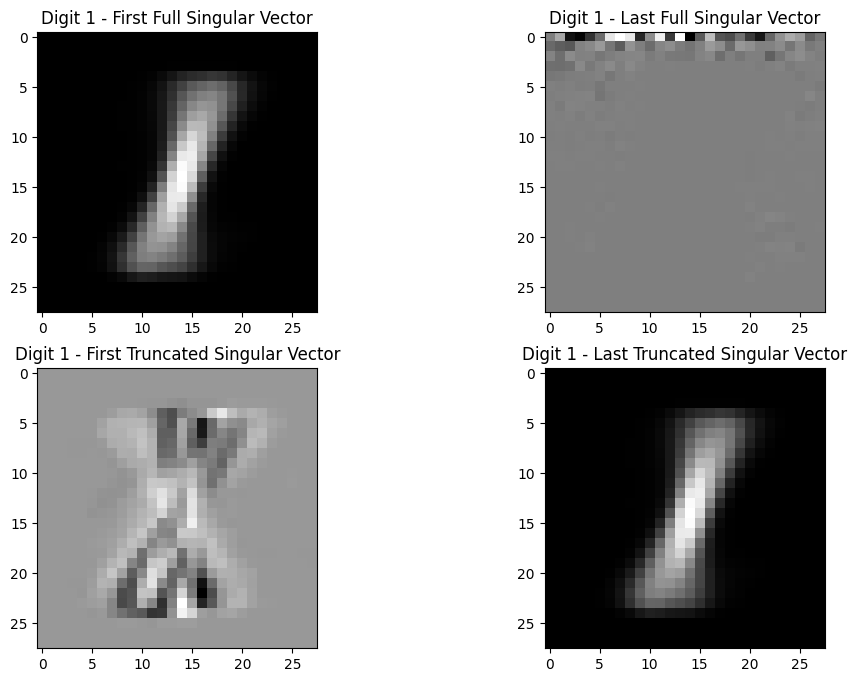

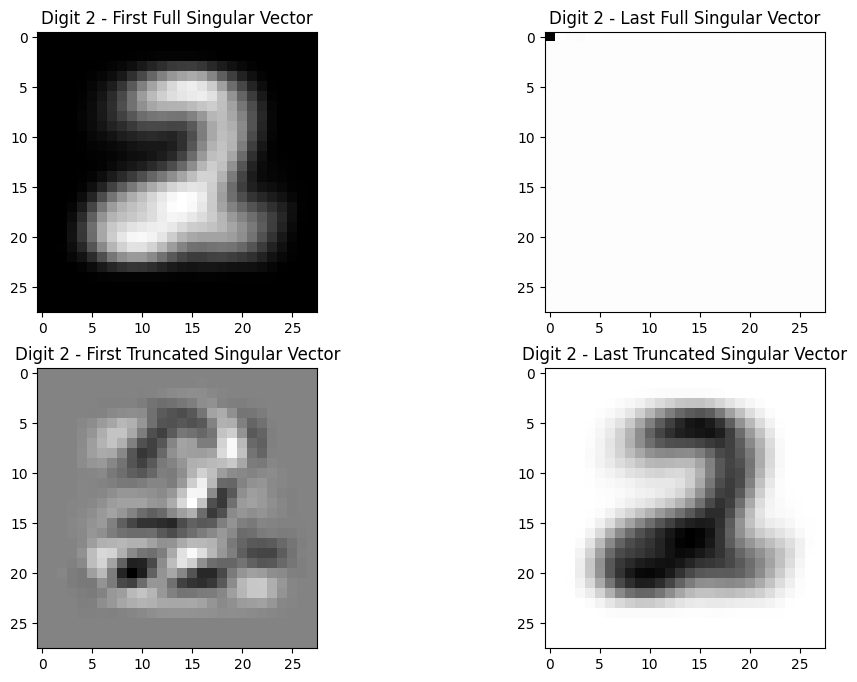

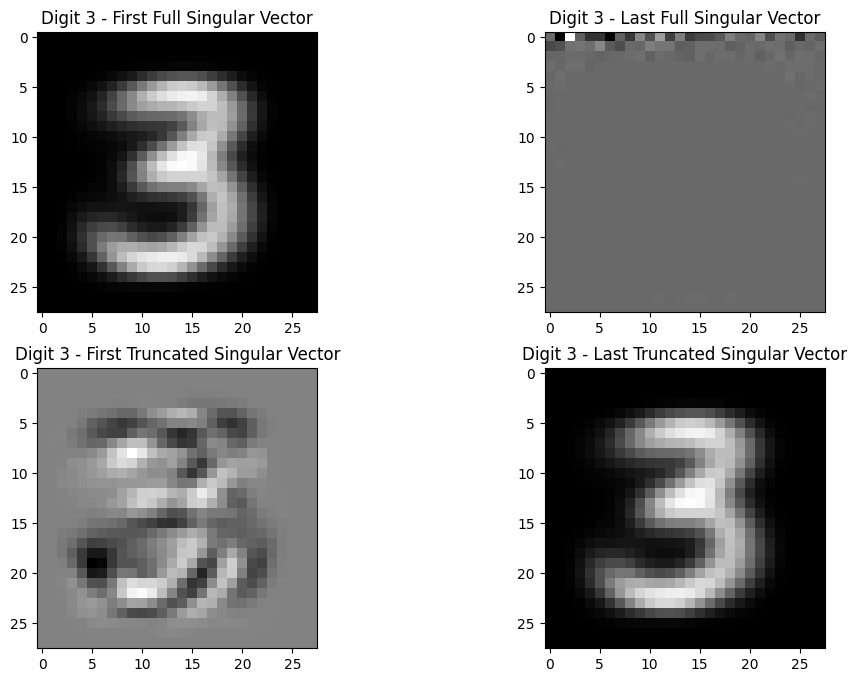

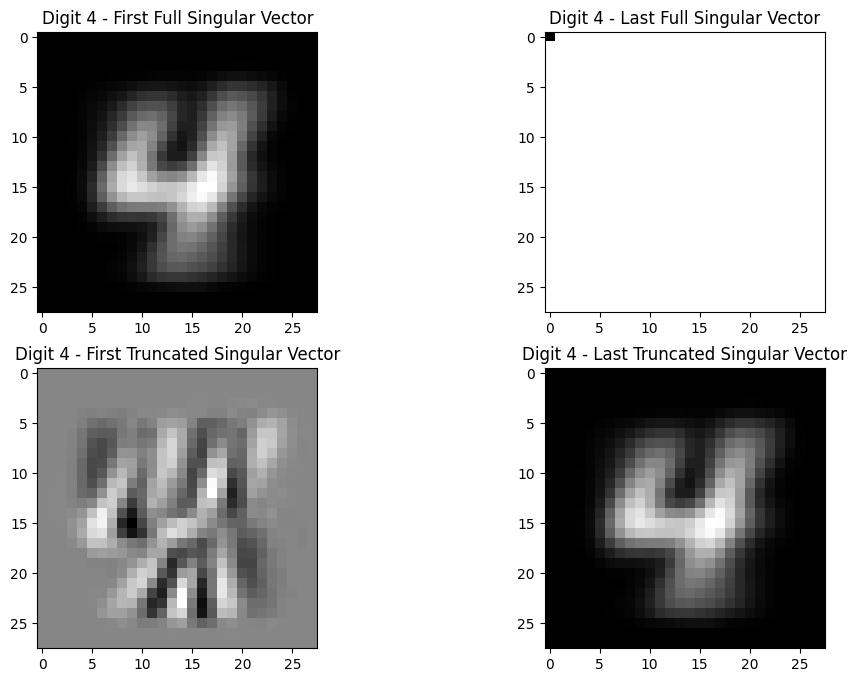

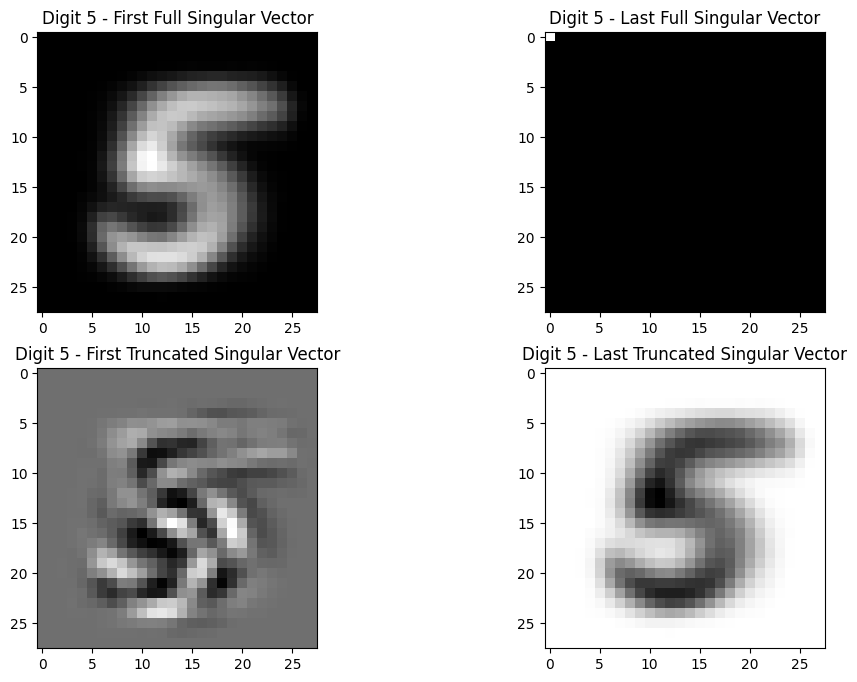

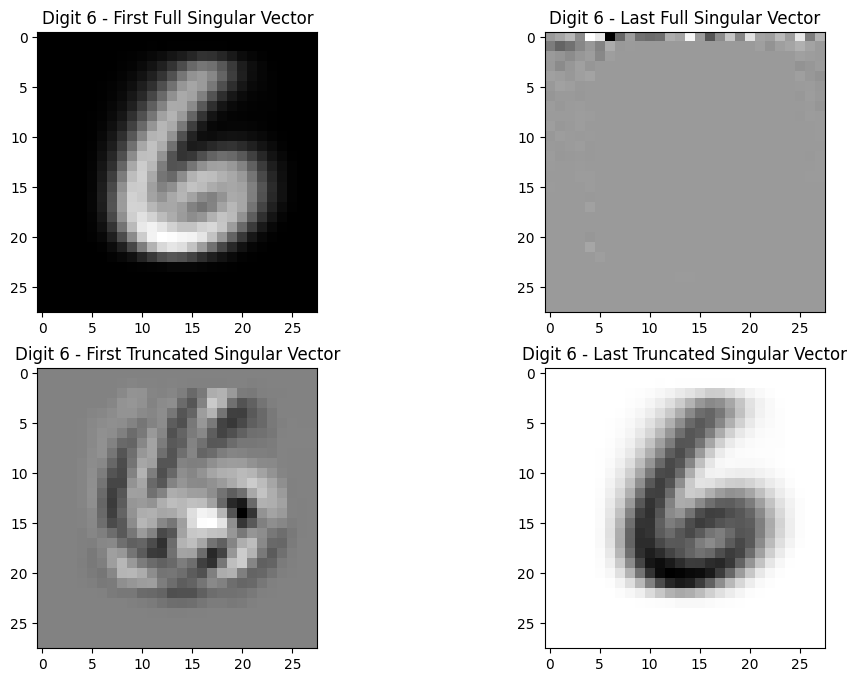

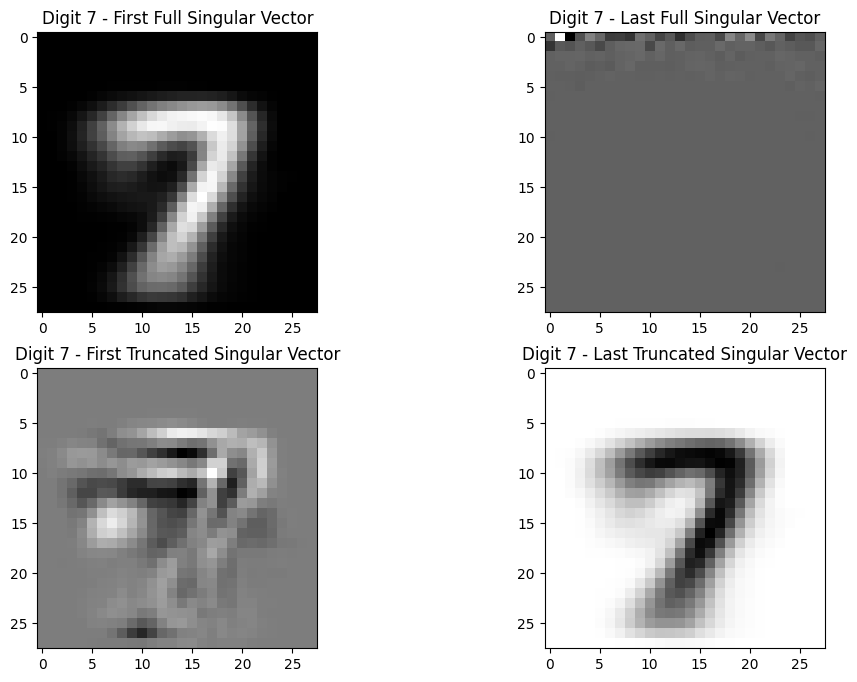

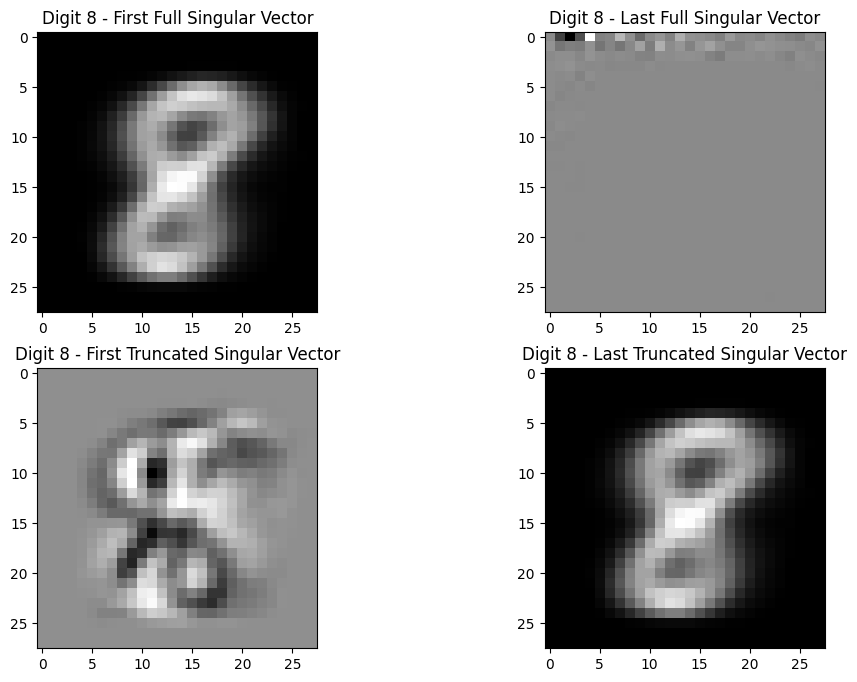

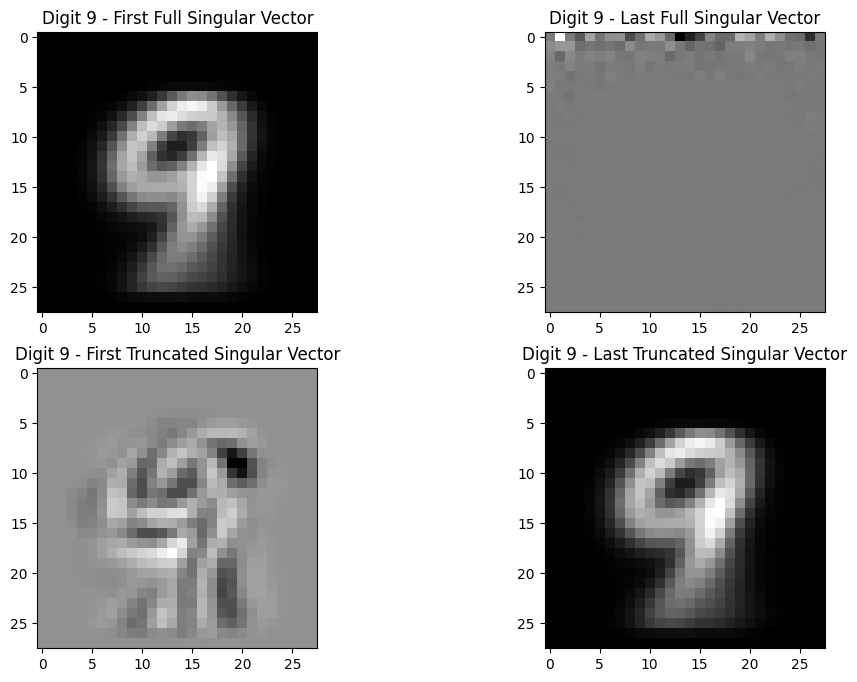

In [19]:

from scipy.sparse.linalg import svds


# Number of training images per digit
m_per_digit = 1000

# Number of singular values to keep
k_singular_values = 20

# Dictionary to store first and last left-singular vectors for each digit
singular_vectors = {}

# Iterate over each digit
for digit in range(10):
    # Select images for the current digit
    digit_indices = np.where(train_labels == digit)[0][:m_per_digit]
    digit_images = train_images[digit_indices].reshape(m_per_digit, -1)

    # Compute full SVD
    _, s_full, vh_full = np.linalg.svd(digit_images, full_matrices=False)

    # Compute truncated SVD
    _, s_truncated, vh_truncated = svds(digit_images, k=k_singular_values)

    # Store the first and last left-singular vectors
    first_singular_vector_full = vh_full[0].reshape(28, 28)
    last_singular_vector_full = vh_full[-1].reshape(28, 28)

    first_singular_vector_truncated = vh_truncated[0].reshape(28, 28)
    last_singular_vector_truncated = vh_truncated[-1].reshape(28, 28)

    singular_vectors[digit] = {
        'first_full': first_singular_vector_full,
        'last_full': last_singular_vector_full,
        'first_truncated': first_singular_vector_truncated,
        'last_truncated': last_singular_vector_truncated
    }

# Display the first and last left-singular vector for each digit
for digit in range(10):
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.imshow(singular_vectors[digit]['first_full'], cmap='gray')
    plt.title(f'Digit {digit} - First Full Singular Vector')

    plt.subplot(2, 2, 2)
    plt.imshow(singular_vectors[digit]['last_full'], cmap='gray')
    plt.title(f'Digit {digit} - Last Full Singular Vector')

    plt.subplot(2, 2, 3)
    plt.imshow(singular_vectors[digit]['first_truncated'], cmap='gray')
    plt.title(f'Digit {digit} - First Truncated Singular Vector')

    plt.subplot(2, 2, 4)
    plt.imshow(singular_vectors[digit]['last_truncated'], cmap='gray')
    plt.title(f'Digit {digit} - Last Truncated Singular Vector')

    plt.show()


In [20]:
from scipy.sparse.linalg import svds
from sklearn.metrics import accuracy_score

# Number of singular values to keep
k_singular_values = 20

# Dictionary to store the matrices U(d)_k for each digit
udk_matrices = {}

# Iterate over each digit
for digit in range(10):
    # Select images for the current digit
    digit_indices = np.where(train_labels == digit)[0]
    digit_images = train_images[digit_indices].reshape(len(digit_indices), -1)

    # Compute truncated SVD
    _, _, vh_truncated = svds(digit_images, k=k_singular_values)

    # Store the matrix U(d)_k
    udk_matrices[digit] = vh_truncated.T

# Function to compute the residuals
def compute_residuals(digit_matrix, test_image):
    reconstructed_image = digit_matrix @ (digit_matrix.T @ test_image)
    return np.linalg.norm(test_image - reconstructed_image)

# Perform classification
predictions = []

for test_image in test_images.reshape(len(test_images), -1):
    residuals = [compute_residuals(udk_matrices[digit], test_image) for digit in range(10)]
    predicted_digit = np.argmin(residuals)
    predictions.append(predicted_digit)

# Compute accuracy
accuracy = accuracy_score(test_labels, predictions)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 95.73%


 **Task: Use the matrices $U^{(d)}_k\in\mathbb{R}^{784\times k}$, $d\in\{0,1,\ldots,9\}$, to perform the classification as presented in the lecture. Compute the accuracy of the prediction. (4 points)** (Remark: 95% can be easily achieved.)

 Hint: Use the array "test_images" from above to make a prediction. Use residuals of the form $\lVert z - U^{(d)} \left( U^{(d)} \right)^{T}z \rVert$ for each digit $d$ and each images $z$ in test_images.

In [22]:
# array of dimension (m, 10), each entry contains the residual
prediction_residuals = np.zeros((test_images.shape[0],10))

# array of dim (m) with predicted digit
prediction_labels = np.zeros(test_images.shape[0], dtype='int')

# TODO:



After having computed the `prediction_residuals` and `prediction_labels` arrays, you can execute the following code for some visualization.

First  10  images with classification results and residuals:


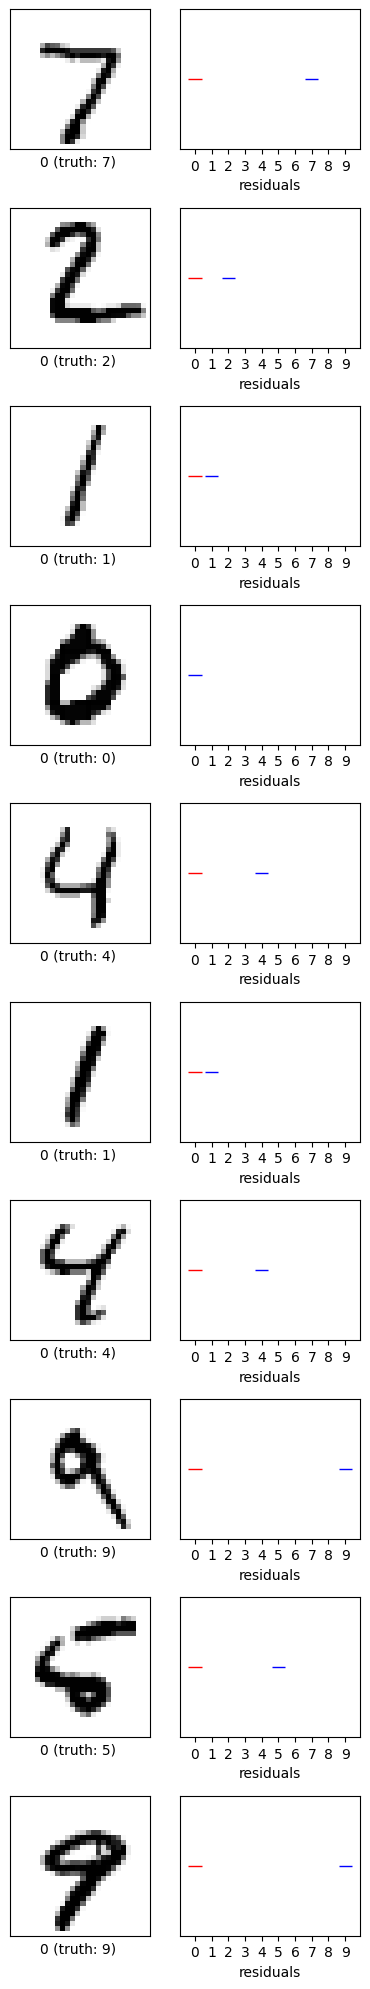

In [24]:
def plot_image_argmin(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmin(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} (truth: {}) ".format(predicted_label,
                                true_label,
                                color=color))

def plot_value_array_argmin(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    plt.xlabel('residuals')
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    predicted_label = np.argmin(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

def plot_first_images_argmin(num_rows, prediction_residuals, test_labels, test_images):
    num_cols = 1
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(num_images):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image_argmin(i, prediction_residuals[i], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array_argmin(i, prediction_residuals[i], test_labels)
    plt.tight_layout()
    plt.show()

# Plot first N images with classification results and residuals
N = 10
print('First ', N, ' images with classification results and residuals:')
plot_first_images_argmin(N, prediction_residuals, test_labels, test_images)

First  10  images with failed classification results and residuals:


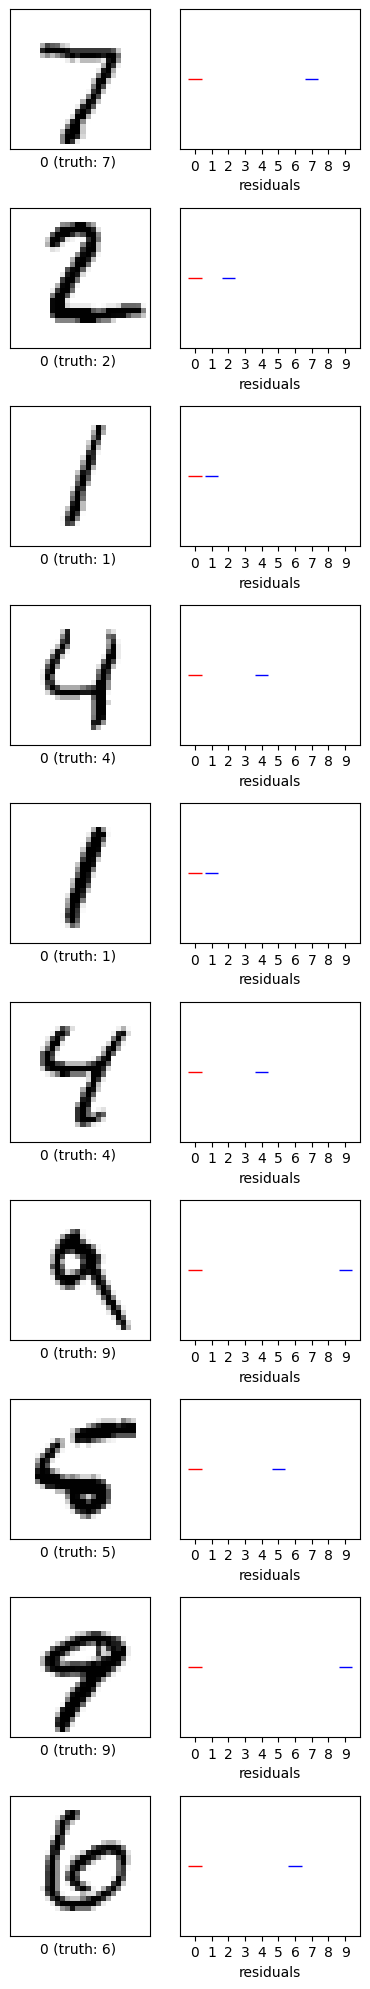

In [25]:
def plot_first_failures(num_rows, prediction_labels, test_labels, prediction_residuals, test_images):
    failed_indices = np.where(prediction_labels != test_labels)[0]
    num_cols = 1
    num_images = num_rows*num_cols
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))
    for i in range(min(num_images,failed_indices.size)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        plot_image_argmin(failed_indices[i], prediction_residuals[failed_indices[i]], test_labels, test_images)
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plot_value_array_argmin(failed_indices[i], prediction_residuals[failed_indices[i]], test_labels)
    plt.tight_layout()
    plt.show()

# Plot images for first N failed classification results
N = 10
print('First ', N, ' images with failed classification results and residuals:')
plot_first_failures(N, prediction_labels, test_labels, prediction_residuals, test_images)

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Explanation is missing and you did not use the right residuals -3 points

### Points 9/12

## (2) SVD-based low-rank approximation of US Supreme Court dataset.

The United States Supreme Court is comprised of judges which are appointed by the president when a seat becomes vacant. Naturally, the two party system of the US leads to the judges being either more conservative or more liberal. In the following, we want to analyze decisions during the time of the 2nd court with Chief Justice Rehnquist.

Execute the following code to load the dataset. The columns of the matrix are the 9 judges and the rows are decisions. The decisions are encoded binary, i.e., in $\{0,1\}$.

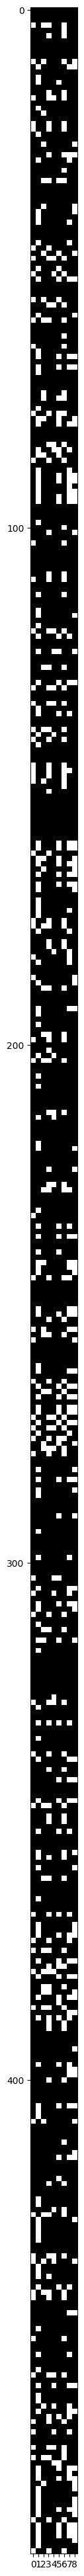

In [39]:
import pandas as pd
c = pd.read_csv('/supreme_court.csv')
A = c.to_numpy().astype(float)

plt.figure(figsize=(1,50))
plt.xticks([0,1,2,3,4,5,6,7,8])
plt.grid(False)
plt.imshow(A, cmap=plt.cm.binary)
plt.show()

In [46]:
np.shape(A)

(492, 9)

In [47]:
A.head()

AttributeError: ignored

# New section

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**As for the MNIST data set, use the truncated SVD to approximate the judges decisions. Try using a different number of singular values. Can you assert a meaning to the singular vectors? (4 Points)**

In [40]:
from sklearn.decomposition import TruncatedSVD

# Specify the number of singular values (components) to keep
n_components = 3  # You can adjust this value based on your requirements

# Perform truncated SVD
svd = TruncatedSVD(n_components=n_components)
A_svd = svd.fit_transform(A)

# Check the shapes of the original and reduced matrices
print("Original Matrix Shape:", A.shape)
print("Reduced Matrix Shape:", A_svd.shape) #-2 points: meaning is missing and your truncated SVD should have the same dimension

Original Matrix Shape: (492, 9)
Reduced Matrix Shape: (492, 3)


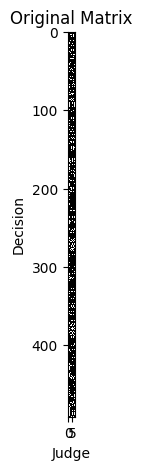

In [41]:
plt.figure(figsize=(10, 5))
plt.imshow(A, cmap='binary', interpolation='none')
plt.title('Original Matrix')
plt.xlabel('Judge')
plt.ylabel('Decision')
plt.show()


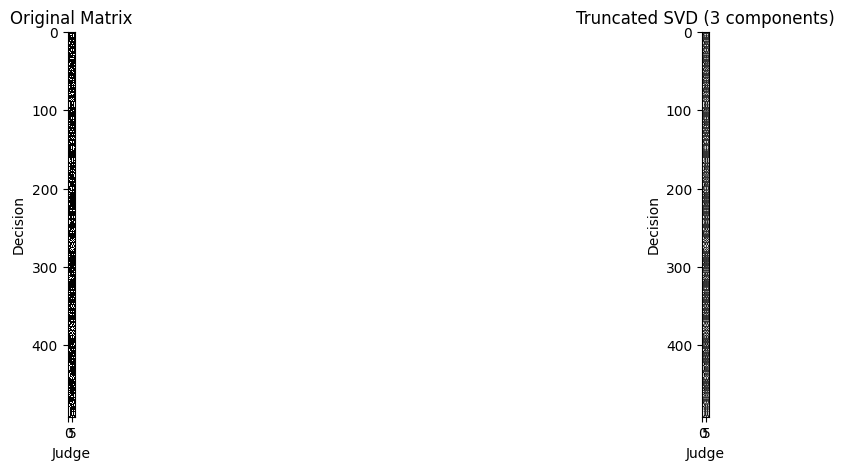

In [42]:
# Reconstruct the matrix from the truncated representation
A_svd_restored = svd.inverse_transform(A_svd)

# Plot the original and reconstructed matrices
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.imshow(A, cmap='binary', interpolation='none')
plt.title('Original Matrix')
plt.xlabel('Judge')
plt.ylabel('Decision')

plt.subplot(1, 2, 2)
plt.imshow(A_svd_restored, cmap='binary', interpolation='none')
plt.title(f'Truncated SVD ({n_components} components)')
plt.xlabel('Judge')
plt.ylabel('Decision')

plt.show()


**Compute the truncated SVD for 3 singular values. Compare the original data set, the computed SVD and the computed SVD with binary cut at 0.5. (4 Points)**

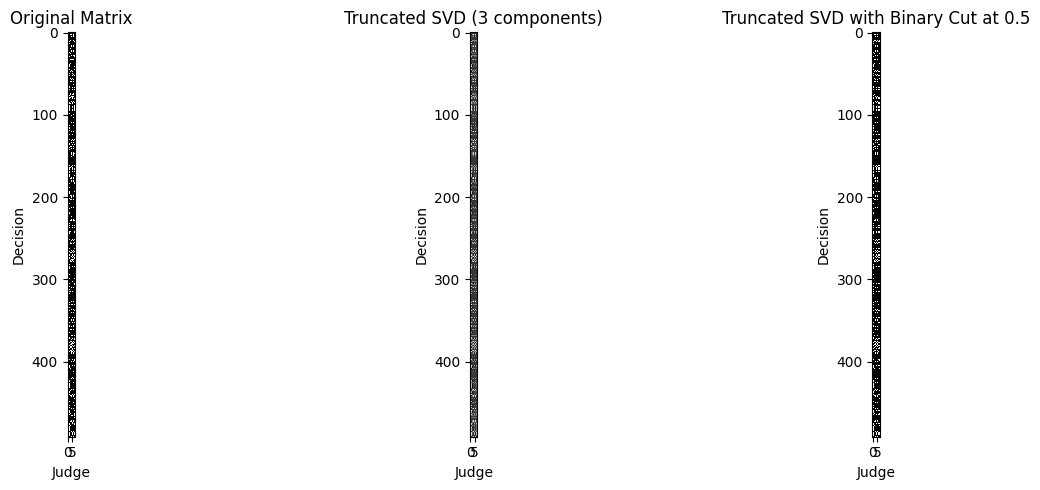

In [43]:


# Visualize the original matrix
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.imshow(A, cmap='binary', interpolation='none')
plt.title('Original Matrix')
plt.xlabel('Judge')
plt.ylabel('Decision')

# Specify the number of singular values (components) to keep
n_components = 3

# Fit the Truncated SVD
svd = TruncatedSVD(n_components=n_components)
A_svd = svd.fit_transform(A)

# Visualize the computed SVD
plt.subplot(1, 3, 2)
plt.imshow(A_svd @ svd.components_, cmap='binary', interpolation='none')
plt.title(f'Truncated SVD ({n_components} components)')
plt.xlabel('Judge')
plt.ylabel('Decision')

# Apply binary cut at 0.5 to the computed SVD
A_svd_binary = np.where(A_svd @ svd.components_ > 0.5, 1, 0)

# Visualize the computed SVD with binary cut
plt.subplot(1, 3, 3)
plt.imshow(A_svd_binary, cmap='binary', interpolation='none')
plt.title(f'Truncated SVD with Binary Cut at 0.5')
plt.xlabel('Judge')
plt.ylabel('Decision')

plt.tight_layout()
plt.show()
#-1 point: no comparison is missing

### Points 5/8

## Total Points 14/20